# Análise de Cluster

## Importando bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

## Importando Dados

In [2]:
dados_paises = pd.read_csv('dados_paises.csv')

display(dados_paises)

print(dados_paises.info())

print(dados_paises.describe().round(2))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
       child_mort  exports  health  imports     income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00     167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89   17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21   19278.07      10.57        8.89   
min        

## Selecionando apenas variáveis métricas

In [3]:
df = dados_paises.iloc[:, 1:]

## Realizando o ZScore porque as medidas estão em unidades diferentes

In [4]:
for coluna in df.columns:
    df[coluna] = stats.zscore(df[coluna]).round(3)

df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.292,-1.138,0.279,-0.082,-0.808,0.157,-1.619,1.903,-0.679
1,-0.539,-0.480,-0.097,0.071,-0.375,-0.312,0.648,-0.860,-0.486
2,-0.273,-0.099,-0.966,-0.642,-0.221,0.789,0.670,-0.038,-0.465
3,2.008,0.775,-1.448,-0.165,-0.585,1.387,-1.179,2.128,-0.516
4,-0.696,0.161,-0.287,0.498,0.102,-0.602,0.704,-0.542,-0.042
...,...,...,...,...,...,...,...,...,...
162,-0.226,0.201,-0.572,0.241,-0.739,-0.490,-0.852,0.366,-0.547
163,-0.527,-0.461,-0.696,-1.213,-0.034,3.617,0.546,-0.317,0.029
164,-0.372,1.130,0.009,1.380,-0.658,0.410,0.287,-0.661,-0.638
165,0.448,-0.406,-0.597,-0.517,-0.659,1.501,-0.345,1.141,-0.638


# Utilizando o método deo Cluster Hierárquico Aglomerativo

## Gerando o dendrograma

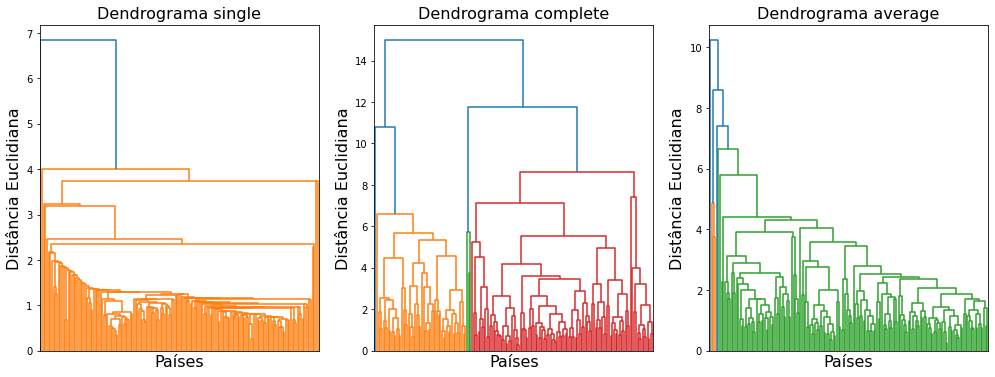

In [14]:
encad = ['single', 'complete', 'average']
dist = ['euclidean', 'sqeuclidean', 'cityblock', 'chebyshev', 'canberra', 'correlation']

# for i in dist:
    
#     plt.figure(figsize=(17, 6))
    
#     for n, j in enumerate(encad):
#         plt.subplot(1, 3, n + 1) 
#         dendrogram = sch.dendrogram(sch.linkage(df, method = j, metric = i), labels = list(dados_paises['country']))
#         plt.title(f'Dendrograma {j}', fontsize=16)
#         plt.xlabel('Países', fontsize=16)
#         plt.ylabel(f'Distância {i}', fontsize=16)

plt.figure(figsize=(17, 6))

for n, j in enumerate(encad):
    plt.subplot(1, 3, n + 1) 
    dendrogram = sch.dendrogram(sch.linkage(df, method = j, metric = 'euclidean'))
    plt.title(f'Dendrograma {j}', fontsize=16)
    plt.xlabel('Países', fontsize=16)
    plt.ylabel(f'Distância Euclidiana', fontsize=16)
    plt.xticks([])


## Gerando a variável com a indicação do cluster no dataset

In [6]:
cluster_sing = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
indica_cluster_sing = cluster_sing.fit_predict(df)

dados_paises['cluster_euclidean_complete'] = indica_cluster_sing

dados_paises_euclidean = dados_paises.groupby('cluster_euclidean_complete').mean().sort_values(by='child_mort').iloc[:,:-1].round(2)
dados_paises_euclidean['num_paises'] = dados_paises['cluster_euclidean_complete'].value_counts()
dados_paises_euclidean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,num_paises
cluster_euclidean_complete,,,,,,,,,
2,4.13,176.00,6.79,156.67,64033.33,2.47,81.43,1.38,3
0,4.50,39.39,10.29,33.21,49721.43,2.09,80.89,1.80,14
1,18.87,42.72,6.41,44.49,18582.00,7.12,74.48,2.14,95
4,81.34,31.52,6.66,49.11,3787.46,8.93,60.56,4.70,54
3,130.00,25.30,5.07,17.40,5150.00,104.00,60.50,5.84,1


## Cluster Não Hierárquico K-means

## Plotando as observações

Text(0.5, 1.0, 'Método do Elbow')

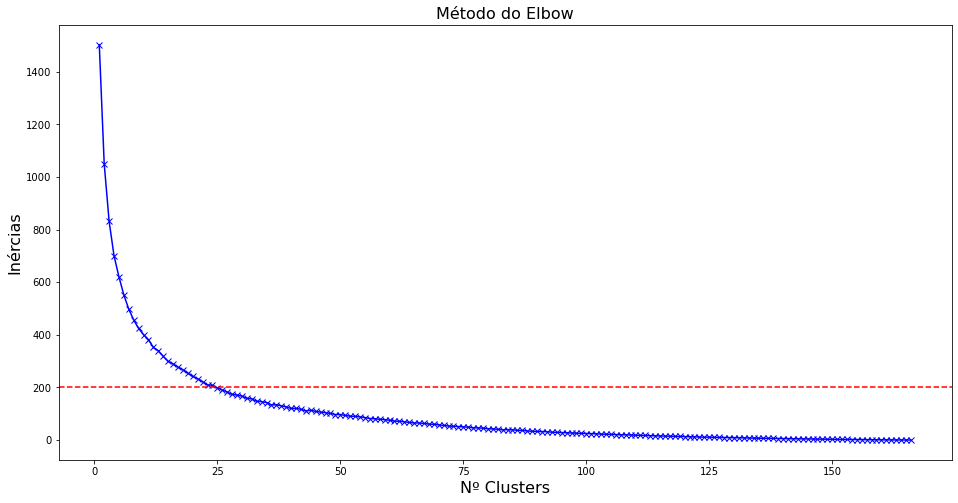

In [7]:
inercias = []

for k in range(1,df.shape[0]):
    kmeanModel = KMeans(n_clusters=k).fit(df)
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(range(1,df.shape[0]), inercias, 'bx-')
plt.axhline(y = 200, color = 'red', linestyle = '--')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Método do Elbow', fontsize=16)

## Pelo Método de Elbow selecionamos 25 Clusters

In [8]:
kmeans = KMeans(n_clusters = 25, init = 'random').fit(df)

## Identifcando os clusters gerados

In [9]:
kmeans_clusters = kmeans.labels_

dados_paises['cluster_kmeans'] = kmeans_clusters

dados_paises_kmeans = dados_paises.groupby('cluster_kmeans').mean().iloc[:,:-1].round(2)
dados_paises_kmeans['num_paises'] = dados_paises['cluster_kmeans'].value_counts()
dados_paises_kmeans

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,num_paises
cluster_kmeans,,,,,,,,,,
0,7.30,47.32,7.24,50.42,25625.00,1.34,77.84,1.77,19880.00,12
1,21.60,37.60,5.18,37.15,12105.00,42.55,70.80,2.56,8075.00,2
2,2.80,175.00,7.77,142.00,91700.00,3.62,81.30,1.63,105000.00,1
3,178.50,13.55,5.44,45.60,1194.00,3.73,39.80,4.27,554.00,2
4,35.78,53.08,5.78,65.50,5945.45,4.90,66.90,3.11,2949.64,11
5,9.72,68.53,2.74,36.45,84600.00,11.84,77.82,2.00,44775.00,4
6,10.99,36.30,10.15,54.19,9697.14,6.93,74.46,1.58,4637.14,7
7,4.80,176.50,6.30,164.00,50200.00,1.89,81.50,1.25,33850.00,2
8,75.06,26.08,5.30,43.66,2162.22,6.35,62.56,4.69,816.78,9


## Identificando as coordenadas centróides dos clusters finais

In [10]:
cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = df.columns
cent_finais.index.name = 'cluster'
cent_finais

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,-0.770333,0.227500,0.156333,0.146083,0.441167,-0.611500,0.821750,-0.779333,0.378333
1,-0.415000,-0.128000,-0.599000,-0.403500,-0.262500,3.299000,0.027500,-0.260500,-0.267500
2,-0.882000,4.899000,0.348000,3.940000,3.879000,-0.395000,1.212000,-0.873000,5.037000
3,3.487500,-1.008000,-0.500500,-0.053500,-0.830000,-0.384500,-3.468500,0.876000,-0.679000
4,-0.062000,0.438182,-0.376909,0.770909,-0.582727,-0.273091,-0.412455,0.108091,-0.547909
5,-0.710000,1.003000,-1.490000,-0.432750,3.509750,0.385500,0.819750,-0.629750,1.740750
6,-0.678571,-0.175857,1.216429,0.302286,-0.387571,-0.081000,0.439714,-0.909143,-0.455571
7,-0.832500,4.954000,-0.186500,4.852000,1.719500,-0.559000,1.234500,-1.121500,1.143000
8,0.914778,-0.549889,-0.552222,-0.134111,-0.779667,-0.135889,-0.902111,1.154111,-0.664889


## Estatística F

In [11]:
# Análise de variância de um fator:
# As variáveis que mais contribuem para a formação de pelo menos um dos clusters

def teste_f_kmeans(kmeans, dataframe):
    
    variaveis = dataframe.columns

    centroides = pd.DataFrame(kmeans.cluster_centers_)
    centroides.columns = dataframe.columns
    centroides
    
    print("Centróides: \n", centroides ,"\n")

    df = dataframe[variaveis]

    unique, counts = np.unique(kmeans.labels_, return_counts=True)

    dic = dict(zip(unique, counts))

    qnt_clusters = kmeans.n_clusters

    observacoes = len(kmeans.labels_)

    df['cluster'] = kmeans.labels_

    output = []

    for variavel in variaveis:

        dic_var={'variavel':variavel}


        variabilidade_entre_grupos = np.sum([dic[index]*np.square(observacao - df[variavel].mean()) \
                                             for index, observacao in enumerate(centroides[variavel])])/(qnt_clusters - 1)

        dic_var['variabilidade_entre_grupos'] = variabilidade_entre_grupos

        variabilidade_dentro_dos_grupos = 0

        for grupo in unique:

            grupo = df[df.cluster == grupo]

            variabilidade_dentro_dos_grupos += np.sum([np.square(observacao - grupo[variavel].mean()) \
                                                       for observacao in grupo[variavel]])/(observacoes - qnt_clusters)

        dic_var['variabilidade_dentro_dos_grupos'] = variabilidade_dentro_dos_grupos

        dic_var['F'] =  dic_var['variabilidade_entre_grupos']/dic_var['variabilidade_dentro_dos_grupos']
        
        dic_var['sig F'] =  1 - stats.f.cdf(dic_var['F'], qnt_clusters - 1, observacoes - qnt_clusters)

        output.append(dic_var)

    df = pd.DataFrame(output)
    
    display(df)

    return df

output = teste_f_kmeans(kmeans,df)

Centróides: 
     child_mort   exports    health   imports    income  inflation  life_expec  \
0    -0.770333  0.227500  0.156333  0.146083  0.441167  -0.611500    0.821750   
1    -0.415000 -0.128000 -0.599000 -0.403500 -0.262500   3.299000    0.027500   
2    -0.882000  4.899000  0.348000  3.940000  3.879000  -0.395000    1.212000   
3     3.487500 -1.008000 -0.500500 -0.053500 -0.830000  -0.384500   -3.468500   
4    -0.062000  0.438182 -0.376909  0.770909 -0.582727  -0.273091   -0.412455   
5    -0.710000  1.003000 -1.490000 -0.432750  3.509750   0.385500    0.819750   
6    -0.678571 -0.175857  1.216429  0.302286 -0.387571  -0.081000    0.439714   
7    -0.832500  4.954000 -0.186500  4.852000  1.719500  -0.559000    1.234500   
8     0.914778 -0.549889 -0.552222 -0.134111 -0.779667  -0.135889   -0.902111   
9    -0.856000  0.393000  1.341500 -0.248000  2.172500  -0.441000    1.245500   
10   -0.449333 -0.617833  0.054750 -0.949000 -0.197500   0.147333    0.568833   
11    0.382875

,variavel,variabilidade_entre_grupos,variabilidade_dentro_dos_grupos,F,sig F
0,child_mort,6.373093,0.098880,64.452973,1.110223e-16
1,exports,5.794137,0.196761,29.447621,1.110223e-16
2,health,5.283506,0.282937,18.673781,1.110223e-16
3,imports,5.642396,0.222397,25.370873,1.110223e-16
4,income,6.068729,0.150412,40.347388,1.110223e-16
5,inflation,6.053219,0.152995,39.564836,1.110223e-16
6,life_expec,6.248265,0.119930,52.099436,1.110223e-16
7,total_fer,6.164832,0.134034,45.994533,1.110223e-16
8,gdpp,6.450492,0.085907,75.086682,1.110223e-16
